In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import os
os.chdir("C:\TrafficSign")

In [4]:
data =[]
labels = []
classes =43 
cur_path = os.getcwd()

In [5]:
cur_path

'C:\\TrafficSign'

In [6]:
for i in range(classes):     
    path = os.path.join(cur_path,'train',str(i))     
    images = os.listdir(path)
    for a in images:
        try:             
            image = Image.open(path +'\\'+ a)             
            image = image.resize((30,30)) 
            # Resizing all images into 30*30                                                 
            image =np.array(image)             
            data.append(image)             
            labels.append(i)
        except Exception as e:
            print(e)

In [7]:
data = np.array(data) 
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [8]:
X_train, X_test, y_train, y_test =train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [9]:
y_train = to_categorical(y_train,43) 
y_test = to_categorical(y_test,43)

In [10]:
model =Sequential() 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25)) 
model.add(Flatten()) 
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
# We have 43 classes that's why we have defined 43in the dense model.add(Dense(43, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [12]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 67s 68ms/step - loss: 1.8418 - accuracy: 0.5321 - val_loss: 0.5088 - val_accuracy: 0.8634
Epoch 2/20
981/981 [==============================] - 67s 69ms/step - loss: 0.8116 - accuracy: 0.7580 - val_loss: 0.3184 - val_accuracy: 0.8961
Epoch 3/20
981/981 [==============================] - 66s 68ms/step - loss: 0.5926 - accuracy: 0.8209 - val_loss: 0.2286 - val_accuracy: 0.9350
Epoch 4/20
981/981 [==============================] - 65s 67ms/step - loss: 0.4608 - accuracy: 0.8611 - val_loss: 0.2445 - val_accuracy: 0.9337
Epoch 5/20
981/981 [==============================] - 67s 68ms/step - loss: 0.3735 - accuracy: 0.8872 - val_loss: 0.1413 - val_accuracy: 0.9606
Epoch 6/20
981/981 [==============================] - 65s 67ms/step - loss: 0.3304 - accuracy: 0.9023 - val_loss: 0.1390 - val_accuracy: 0.9578
Epoch 7/20
981/981 [==============================] - 70s 71ms/step - loss: 0.2975 - accuracy: 0.9126 - val_loss: 0.0934 - val_accuracy:

In [19]:
model.save("./training/TSR.h5")

In [25]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [26]:
X_test, label = testing('Test.csv')

In [37]:
Y_pred=model.predict(X_test) 
classes_x=np.argmax(Y_pred,axis=1)


395/395 [==============================] - 6s 16ms/step


In [38]:
classes_x

array([16,  1, 38, ..., 32,  7, 10], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(label,classes_x)

0.9491686460807601

In [40]:
model.save("./training/TSR.h5")

In [43]:
import os
os.chdir("C:\TrafficSign")
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [44]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Vehicle > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing vehicle > 3.5 tons' }


In [53]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred=model.predict(X_test) 
    classes_x=np.argmax(Y_pred,axis=1)
    return image,classes_x

1/1 [==============================] - 0s 18ms/step
Predicted traffic sign is:  General caution


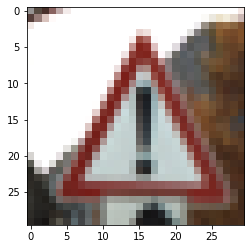

In [56]:
plot,prediction = test_on_img(r'C:\TrafficSign\Test\00006.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()